In [1]:
#load all libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#merging all the datasets
df = train_df.merge(features_df, on=['Store', 'Date'], how='inner').merge(stores_df, on=['Store'], how='inner')

In [ ]:
# finding the shape of the dataset
df.shape

(70562, 17)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,FALSE,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,FALSE,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,FALSE,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,FALSE,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,FALSE,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [ ]:
# Let's explore variables, their data types, and total non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 70562 entries, 0 to 70561
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         70562 non-null  int64  
 1   Dept          70562 non-null  int64  
 2   Date          70562 non-null  object 
 3   Weekly_Sales  70562 non-null  float64
 4   IsHoliday_x   70562 non-null  object 
 5   Temperature   70562 non-null  float64
 6   Fuel_Price    70562 non-null  float64
 7   MarkDown1     25234 non-null  float64
 8   MarkDown2     20168 non-null  float64
 9   MarkDown3     23702 non-null  float64
 10  MarkDown4     24889 non-null  float64
 11  MarkDown5     25234 non-null  float64
 12  CPI           70562 non-null  float64
 13  Unemployment  70562 non-null  float64
 14  IsHoliday_y   70562 non-null  bool   
 15  Type          70562 non-null  object 
 16  Size          70562 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(3)
memory usage: 9.2+ MB


In [ ]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,70562.000000,70562.000000,70562.000000,70562.000000,70562.000000,25234.000000,20168.000000,23702.000000,24889.000000,25234.000000,70562.000000,70562.000000,70562.000000
mean,4.080256,42.640529,17544.341381,63.945482,3.221950,7149.519581,3131.169255,1390.203850,3100.085951,4609.190925,200.967795,7.100792,133568.325161
std,2.090044,30.000829,25757.966720,17.994359,0.424626,7968.284121,10185.186824,9053.365668,5509.648471,5134.316867,31.155787,1.093684,71868.085398
min,1.000000,1.000000,-1098.000000,-2.060000,2.514000,35.940000,-10.980000,0.010000,4.000000,135.160000,126.064000,3.879000,34875.000000
25%,2.000000,17.000000,2342.882500,51.180000,2.762000,2565.800000,30.000000,4.590000,444.640000,1790.310000,196.951558,6.496000,37392.000000
50%,4.000000,35.000000,7736.345000,66.270000,3.290000,5183.290000,151.000000,21.980000,1282.300000,3558.180000,213.667086,7.143000,151315.000000
75%,6.000000,71.000000,21096.477500,79.510000,3.594000,8813.810000,1555.570000,98.670000,3639.420000,5715.690000,219.237049,7.872000,202505.000000
max,8.000000,99.000000,385051.040000,93.340000,3.936000,75149.790000,92523.940000,83340.330000,48159.860000,58068.140000,227.036936,9.137000,205863.000000


In [ ]:
# summary statistics of the dataset
df[['Weekly_Sales', 'Temperature', 'CPI', 'Size']].describe()

,Weekly_Sales,Temperature,CPI,Size
count,70562.000000,70562.000000,70562.000000,70562.000000
mean,17544.341381,63.945482,200.967795,133568.325161
std,25757.966720,17.994359,31.155787,71868.085398
min,-1098.000000,-2.060000,126.064000,34875.000000
25%,2342.882500,51.180000,196.951558,37392.000000
50%,7736.345000,66.270000,213.667086,151315.000000
75%,21096.477500,79.510000,219.237049,202505.000000
max,385051.040000,93.340000,227.036936,205863.000000


In [ ]:
print('Min Date in Data is - {}'.format(df['Date'].min()))
print('Max Date in Data is - {}'.format(df['Date'].max()))


Min Date in Data is - 2010-02-05
Max Date in Data is - 2012-10-26


  Type  Store
0    A      5
1    B      3


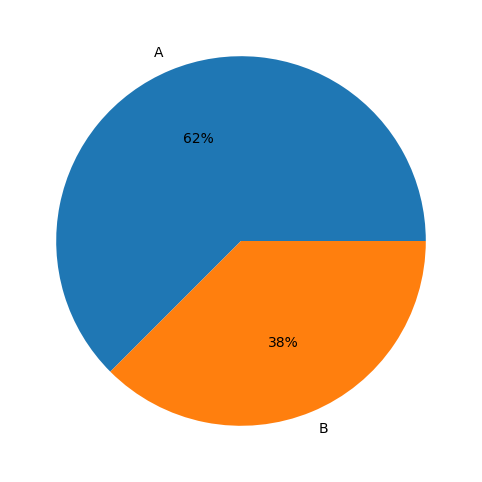

In [ ]:
temp = pd.DataFrame(df.groupby('Type')['Store'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (12,6))
plt.pie(temp['Store'], labels = temp['Type'], autopct = '%.0f%%')
plt.show()

<Axes: xlabel='Type', ylabel='Size'>

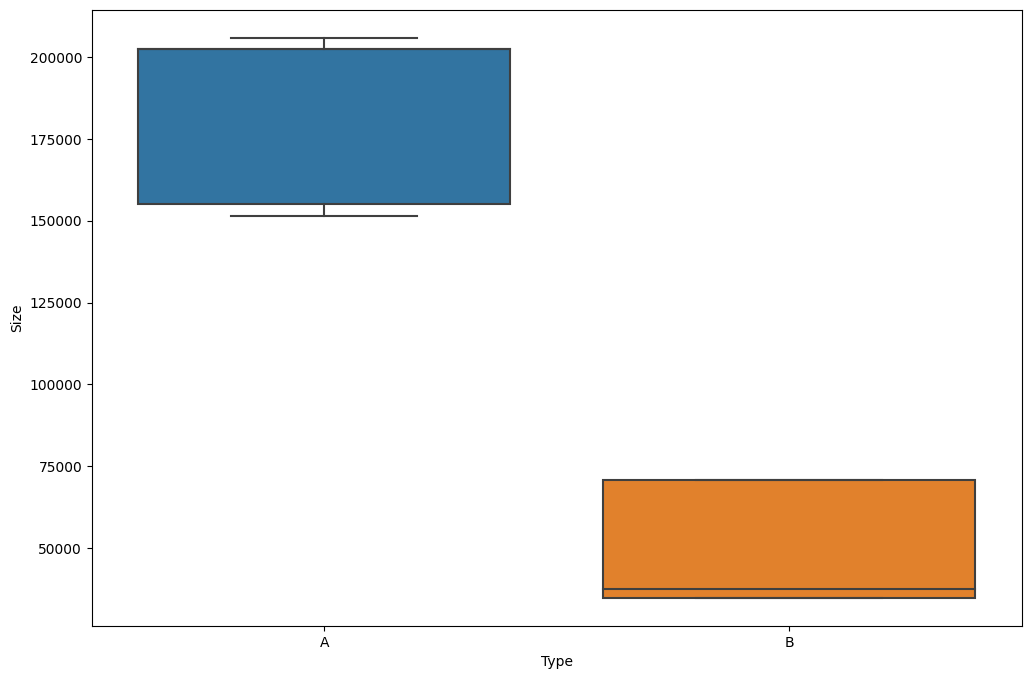

In [ ]:
# size distribution of stores for each store type
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Type', y ='Size', data = df, showfliers = False)


<Axes: xlabel='Type', ylabel='Weekly_Sales'>

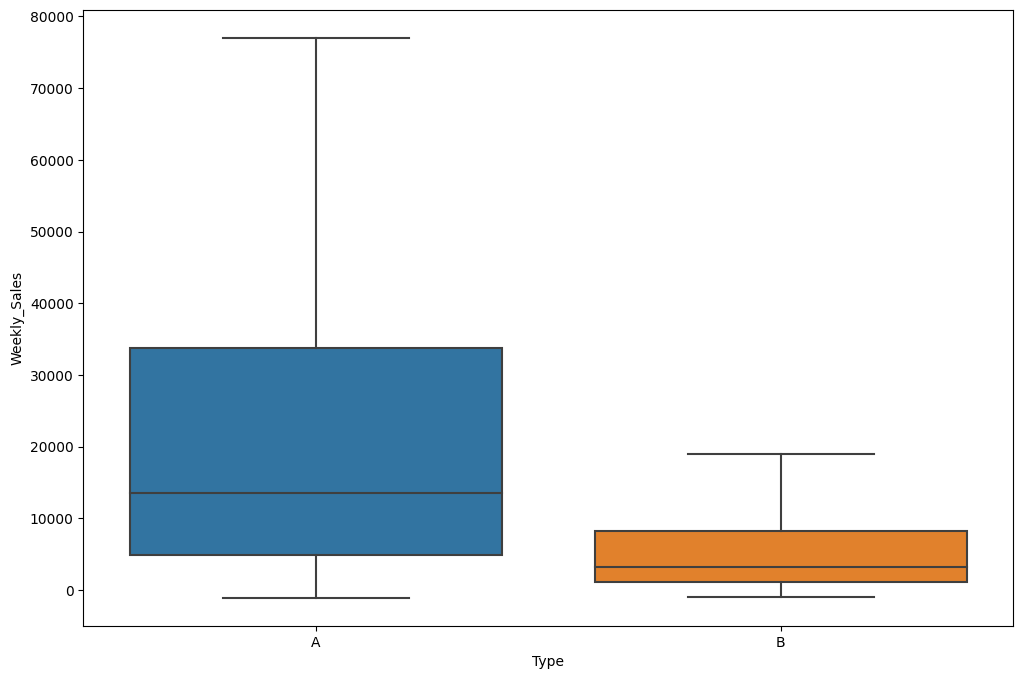

In [ ]:
# Distribution of weekly sales based on store type
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Type', y ='Weekly_Sales', data = df, showfliers = False)


<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

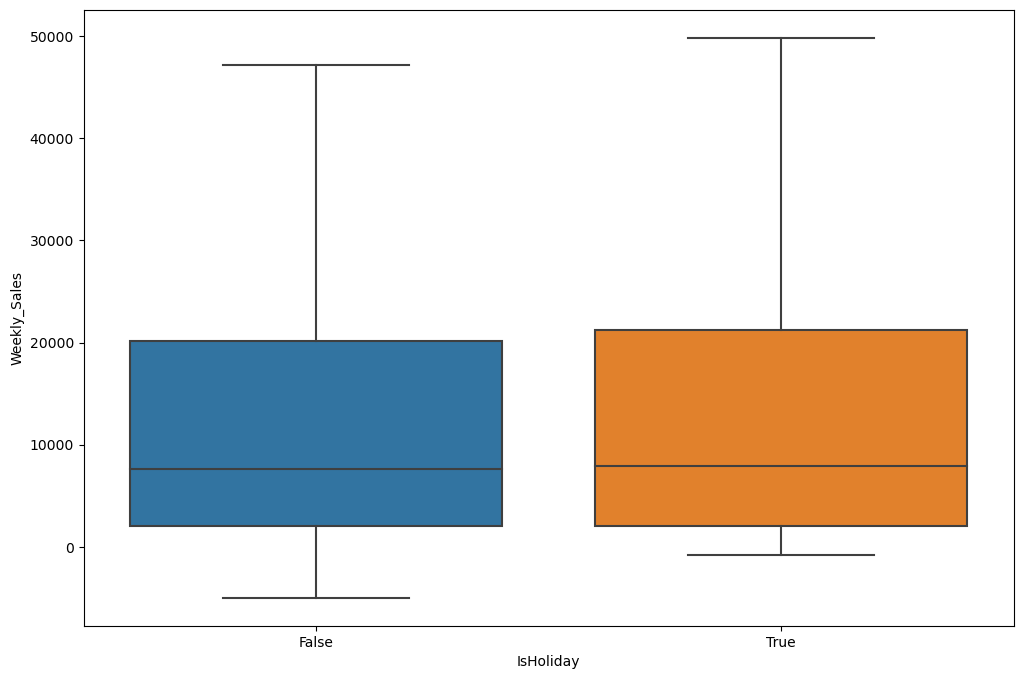

In [ ]:
# impact of holidays on weekly sales
plt.figure(figsize = (12,8))
sns.boxplot(x = 'IsHoliday', y ='Weekly_Sales', data = df, showfliers = False)


<Axes: >

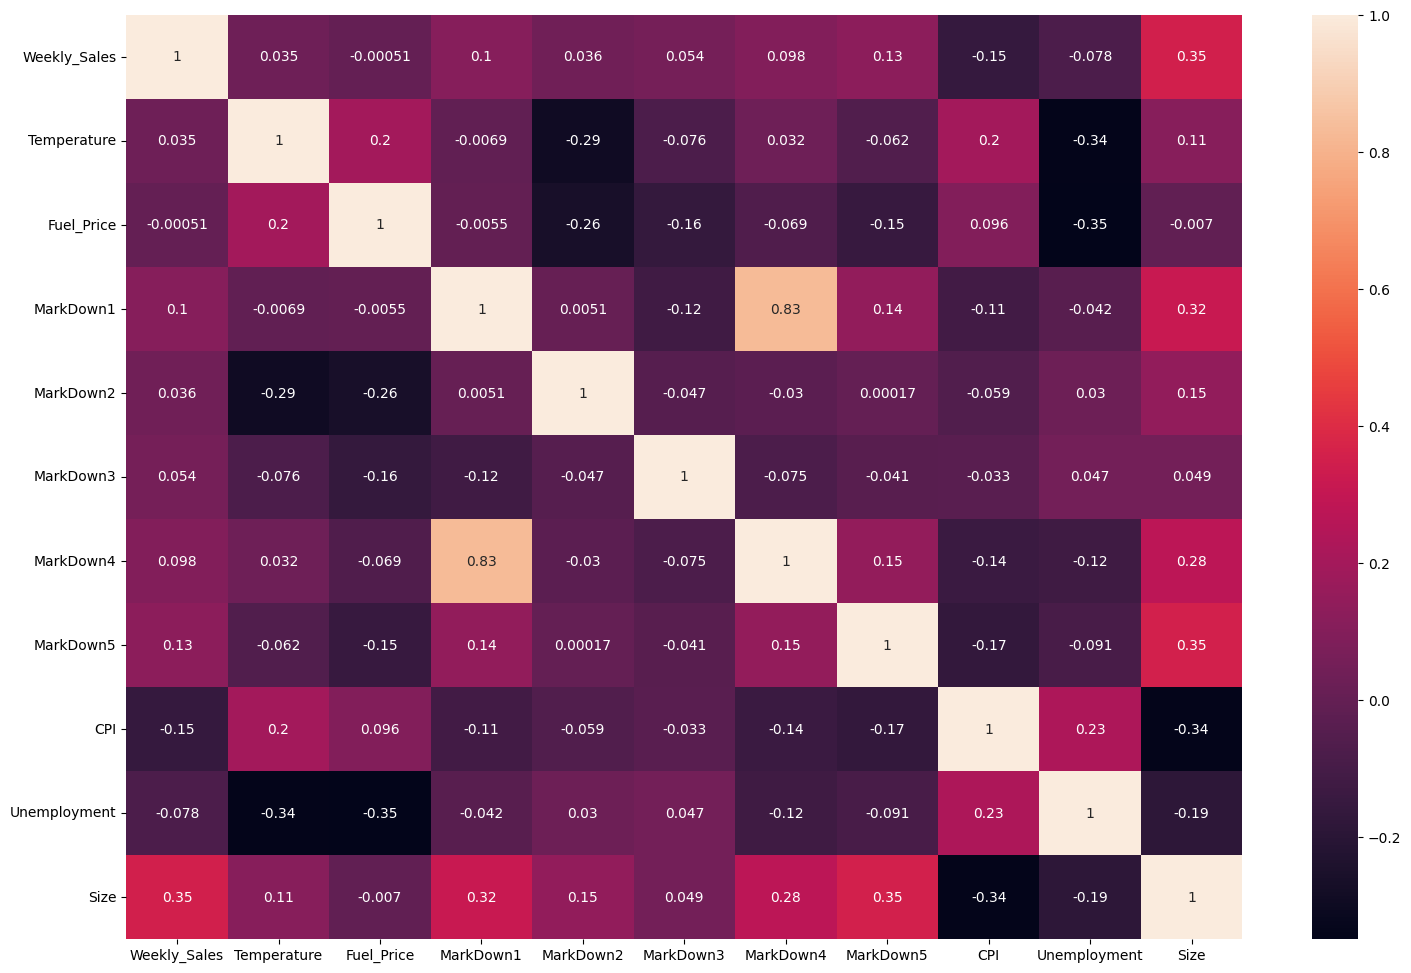

In [ ]:
feature_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size']
plt.figure(figsize = (18,12))
sns.heatmap(df[feature_cols].corr(), annot = True)


In [ ]:
# Impute NULL values
df['MarkDown1'] = df['MarkDown1'].fillna(0)
df['MarkDown2'] = df['MarkDown2'].fillna(0)
df['MarkDown3'] = df['MarkDown3'].fillna(0)
df['MarkDown4'] = df['MarkDown4'].fillna(0)
df['MarkDown5'] = df['MarkDown5'].fillna(0)

In [ ]:

# create year, month, and date
df['Date'] = pd.to_datetime(df['Date'])
df['month_date'] = df['Date'].apply(lambda i : i.month)
df['day_date'] = df['Date'].apply(lambda i : i.day)
df['year_date'] = df['Date'].apply(lambda i : i.year)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,month_date,day_date,year_date
0,1,1,2010-02-05,24924.50,FALSE,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,5,2010
1,1,2,2010-02-05,50605.27,FALSE,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,5,2010
2,1,3,2010-02-05,13740.12,FALSE,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,5,2010
3,1,4,2010-02-05,39954.04,FALSE,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,5,2010
4,1,5,2010-02-05,32229.38,FALSE,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,5,2010


In [ ]:


# one hot encoding
cols_to_encode = ['Type', 'IsHoliday_y']
df = pd.get_dummies(data = df, columns = cols_to_encode, drop_first = True)

In [ ]:

# Standard Scaler
standard_scaler = StandardScaler()
feature_cols = ['Temperature', 'Fuel_Price', 'MarkDown1','MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']
transformed_features = standard_scaler.fit_transform(df[feature_cols])

df[feature_cols] = transformed_features



In [ ]:
df['IsHoliday_x'].replace("FALSE",0,inplace=True)

In [ ]:
df['IsHoliday_x'].replace("TRUE",1,inplace=True)

In [ ]:
# split data into train and test
feature_cols  = df.columns.tolist()
feature_cols = [i for i in feature_cols if i not in ['Date', 'Weekly_Sales']]
x_train, x_test, y_train, y_test = train_test_split(df[feature_cols], df['Weekly_Sales'], test_size = 0.2, random_state = 1234)


In [ ]:
x_test['IsHoliday_x'].replace("TRU",1,inplace=True)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors = 10, n_jobs = 4)
knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {knn_regressor.score(x_test, y_test)}')


MAE is - 9331.932357684405
RMSE is - 15753.473189172315
Accuracy Score is - 0.6217702564649132


<Axes: xlabel='Weekly_Sales'>

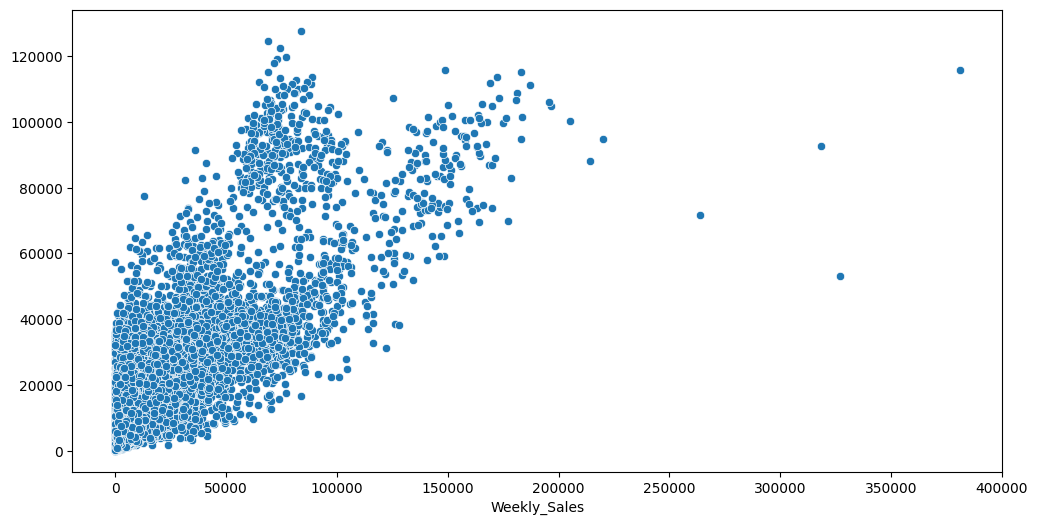

In [ ]:
# scatter plot between observed and predicted values of weekly sales from KNN regressor
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 1234)
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {decision_tree_regressor.score(x_test, y_test)}')


MAE is - 2021.3305250478284
RMSE is - 4920.005037049203
Accuracy Score is - 0.9631078354790117


In [ ]:
rf_regressor = RandomForestRegressor(n_estimators = 400, max_depth = 15, random_state = 1234, n_jobs = 5)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {rf_regressor.score(x_test, y_test)}')


MAE is - 1760.559425111857
RMSE is - 4532.76664927739
Accuracy Score is - 0.9686866331856993


<Axes: xlabel='Weekly_Sales'>

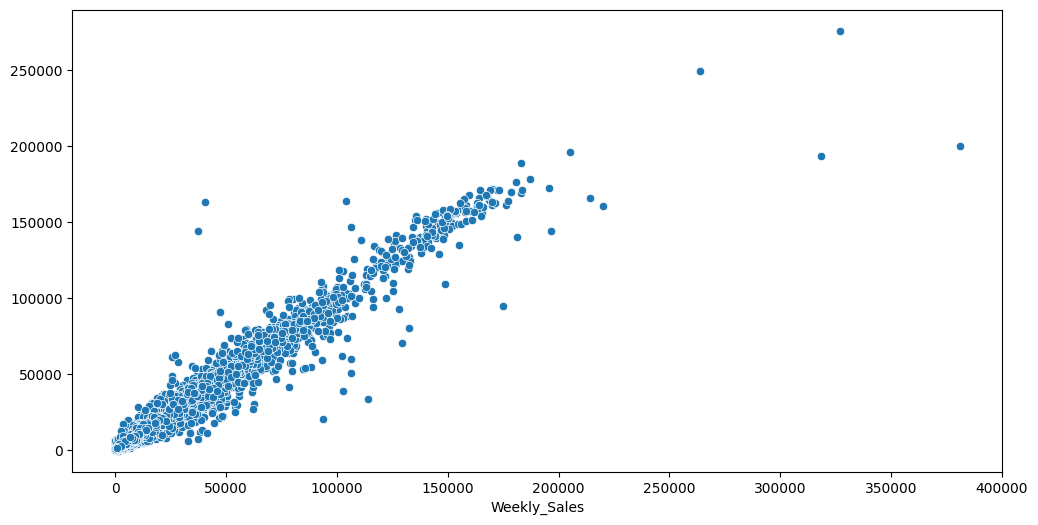

In [ ]:
# scatter plot between observed and predicted values of weekly sales from XGBoost regressor
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)